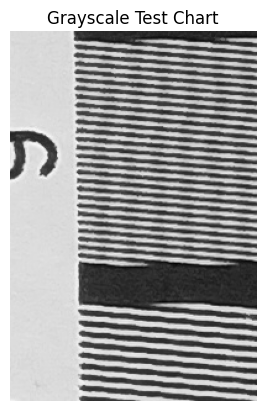

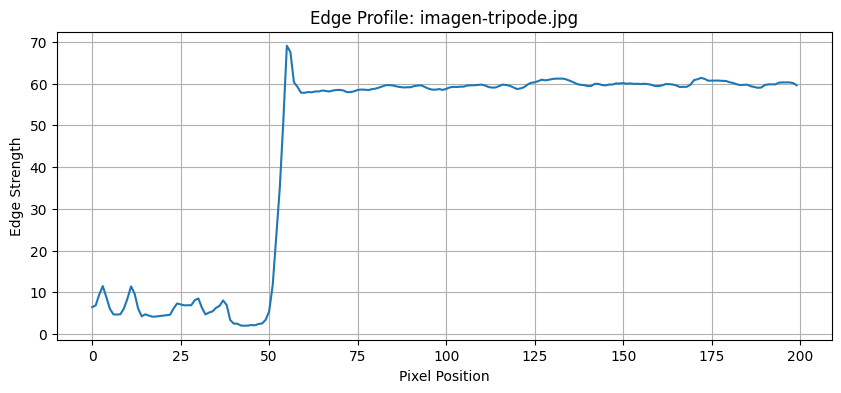

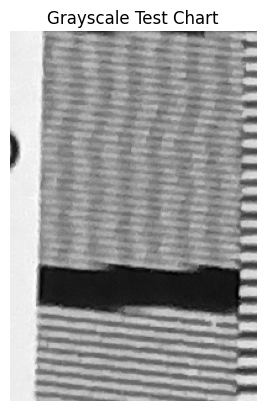

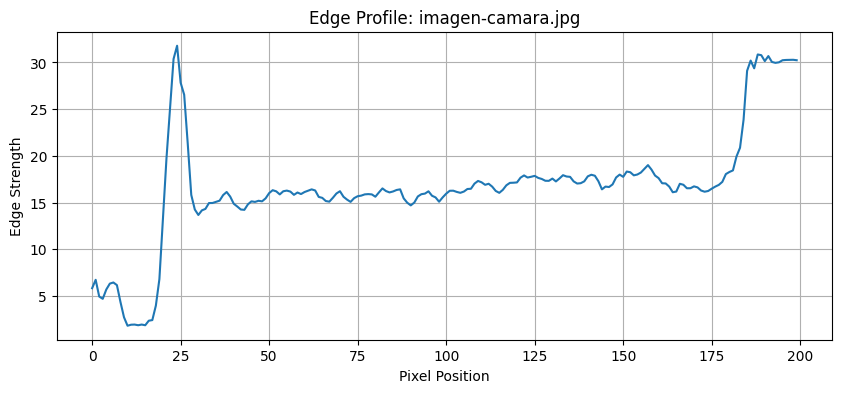

Resolución cámara fija: 1.60 lp/mm
Resolución cámara en mano: 1.70 lp/mm
Resolución comercial declarada: 250.00 lp/mm
⚠️ La cámara en mano supera o iguala la resolución de la cámara fija, lo cual puede indicar problemas en el experimento.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from scipy.signal import find_peaks

def estimate_resolution(image_path, crop_coords, physical_width_mm):
    image = io.imread(image_path)
    gray = color.rgb2gray(image)

    y1, y2, x1, x2 = crop_coords
    region = gray[y1:y2, x1:x2]

    edges = filters.sobel(region)
    profile = np.sum(edges, axis=0)

    peaks, _ = find_peaks(profile, height=0.05, distance=2)
    num_line_pairs = len(peaks) // 2

    lp_per_mm = num_line_pairs / physical_width_mm

    plt.imshow(region, cmap='gray')
    plt.title("Grayscale Test Chart")
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(profile)
    plt.title(f"Edge Profile: {image_path}")
    plt.xlabel("Pixel Position")
    plt.ylabel("Edge Strength")
    plt.grid(True)
    plt.show()

    return lp_per_mm

crop_coords = (1500, 1800, 2800, 3000)  # TODO: ajustar bien las coords
physical_width_mm = 10              # Ancho físico del área analizada

# Comparación entre cámara fija y en mano
res_fija = estimate_resolution('imagen-tripode.jpg', crop_coords, physical_width_mm)
res_mano = estimate_resolution('imagen-camara.jpg', crop_coords, physical_width_mm)

# Resolución comercial 
res_comercial_lpmm = 250  # TODO: ajustar con los settings de la camara

# Resultados
print(f"Resolución cámara fija: {res_fija:.2f} lp/mm")
print(f"Resolución cámara en mano: {res_mano:.2f} lp/mm")
print(f"Resolución comercial declarada: {res_comercial_lpmm:.2f} lp/mm")

# Conclusión preliminar
if res_fija > res_mano:
    print("✅ La cámara fija ofrece mayor resolución efectiva que la cámara en mano.")
else:
    print("⚠️ La cámara en mano supera o iguala la resolución de la cámara fija, lo cual puede indicar problemas en el experimento.")
